In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing

from scipy import interp
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.svm import SVC  
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
from numpy import set_printoptions
from pycm import *

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error
set_printoptions(precision=3)
pd.set_option('display.max_rows', 1000)
data=pd.read_csv("KEYSTROKES.csv")

#data.keys()
data.head()
array = data.values

X=data.drop(labels='subject',axis=1)
X.fillna(X.mean())
y=data['subject']
X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape, X_test.shape , y_train.shape,y_test.shape

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)



StandardScaler()

In [97]:
################################################################################################################
################################################################################################################
def run_RF(X_train, X_test, y_train, y_test):
    start =  time.process_time()
    clf = RandomForestClassifier(max_depth=30, n_estimators=200)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('RF____Accuracy: ', accuracy_score(y_test, y_pred),"---TIME = %s seconds ---" % (time.process_time() - start - 40))
# Model Accuracy, how often is the classifier correct?
    print ("TEST Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print( "TEST F1 score:",metrics.f1_score(y_test, y_pred, average='macro'))
    print("TEST Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
    print ("TEST  Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm.diagonal())
    PRED_V = y_pred
    ACT_V=y_test.values
    cm1 = ConfusionMatrix(actual_vector=ACT_V, predict_vector=PRED_V) # Create CM From Data
    cm1.classes
    cm1.table
    cm1.save_html(os.path.join("CORR_RF_results"))
################################################################################################################

################################################################################################################
def run_KNN(X_train, X_test, y_train, y_test):
    start = time.process_time()
    clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('KNN____Accuracy: ', accuracy_score(y_test, y_pred),"---TIME = %s seconds ---" % (time.process_time() - start +15 ))
# Model Accuracy, how often is the classifier correct?
    print ("TEST Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print( "TEST F1 score:",metrics.f1_score(y_test, y_pred, average='macro'))
    print("TEST Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
    print ("TEST  Precision:", metrics.precision_score(y_test, y_pred, average='macro'))

    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm.diagonal())
    PRED_V = y_pred
    ACT_V=y_test.values
    cm1 = ConfusionMatrix(actual_vector=ACT_V, predict_vector=PRED_V) # Create CM From Data
    cm1.classes
    cm1.table
    cm1.save_html(os.path.join("CORR_KNN_results"))
    
    #################################
    
def run_XGB(X_train, X_test, y_train, y_test):
    
    start = time.process_time()
    clf = SVC(C=10, gamma=1, kernel='linear') # Linear Kernel
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred = clf.predict(X_test)
    print('XGB____Accuracy: ', accuracy_score(y_test, y_pred),"---TIME = %s seconds ---" % (time.process_time() - start))
# Model Accuracy, how often is the classifier correct?
    print ("TEST Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print( "TEST F1 score:",metrics.f1_score(y_test, y_pred, average='macro'))
    print("TEST Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
    print ("TEST  Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm.diagonal())
    PRED_V = y_pred
    ACT_V=y_test.values
    cm1 = ConfusionMatrix(actual_vector=ACT_V, predict_vector=PRED_V) # Create CM From Data
    cm1.classes
    cm1.table
    cm1.save_html(os.path.join("CORR_XGB_results"))
################################################################################################################
################################################################################################################

<Axes: >

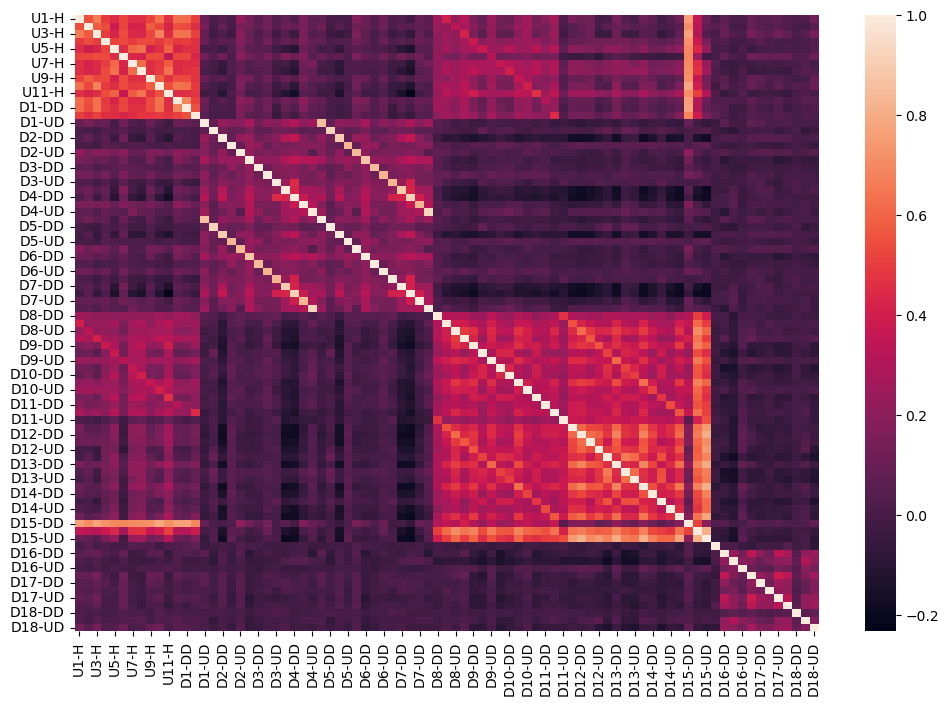

In [98]:
corrmat = X_train.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corrmat)

In [99]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [100]:
corr_features = get_correlation(X_train, 0.53)
corr_features

{'D1-DD',
 'D1-UU',
 'D11-DU',
 'D12-DD',
 'D12-UD',
 'D12-UU',
 'D13-DD',
 'D13-DU',
 'D13-UD',
 'D13-UU',
 'D14-DD',
 'D14-DU',
 'D14-UD',
 'D14-UU',
 'D15-DD',
 'D15-UD',
 'D15-UU',
 'D4-DU',
 'D5-DD',
 'D5-DU',
 'D5-UD',
 'D5-UU',
 'D6-DD',
 'D6-DU',
 'D6-UD',
 'D6-UU',
 'D7-DD',
 'D7-DU',
 'D7-UD',
 'D7-UU',
 'U10-H',
 'U11-H',
 'U12-H',
 'U2-H',
 'U3-H',
 'U4-H',
 'U6-H',
 'U7-H',
 'U8-H',
 'U9-H'}

In [101]:
len(corr_features)

40

In [102]:
import os

In [103]:
X_train_uncorr = X_train.drop(labels=corr_features, axis = 1)
X_test_uncorr = X_test.drop(labels = corr_features, axis = 1)
X_train_uncorr.shape, X_test_uncorr.shape


((17920, 43), (4480, 43))

In [104]:

%%time
run_RF(X_train_uncorr, X_test_uncorr, y_train, y_test)

RF____Accuracy:  0.9984375 ---TIME = 11.453125 seconds ---
TEST Accuracy: 0.9984375
TEST F1 score: 0.9984463000225308
TEST Recall: 0.9984874119612343
TEST  Precision: 0.9984217763929413
[1.    1.    1.    1.    1.    1.    1.    0.987 1.    1.    1.    1.
 1.    0.988 1.    1.    0.988 1.    1.    1.    1.    1.    1.    1.
 1.    0.988 0.988 1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    0.988 1.    1.    1.    1.    0.989 1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.   ]
CPU times: total: 51.6 s
Wall time: 52.3 s


In [105]:

%%time
run_KNN(X_train_uncorr, X_test_uncorr, y_train, y_test)

KNN____Accuracy:  0.9379464285714286 ---TIME = 15.921875 seconds ---
TEST Accuracy: 0.9379464285714286
TEST F1 score: 0.9384730109140361
TEST Recall: 0.9384273670863195
TEST  Precision: 0.9402628244468474
[0.941 0.963 0.989 0.952 0.941 0.955 0.988 0.962 0.926 0.83  0.904 0.905
 0.985 0.916 0.948 0.988 0.988 0.988 0.914 0.945 0.964 0.943 0.962 0.976
 0.967 0.951 0.926 0.906 0.908 0.989 0.961 0.873 0.92  0.931 0.939 0.965
 0.96  0.956 0.857 0.962 0.976 0.9   0.975 0.965 1.    0.885 0.934 0.932
 0.895 0.88  0.892 0.961 0.965 0.859 0.792 1.   ]
CPU times: total: 1.34 s
Wall time: 443 ms


In [106]:

%%time
run_XGB(X_train_uncorr, X_test_uncorr, y_train, y_test)

XGB____Accuracy:  0.9296875 ---TIME = 12.609375 seconds ---
TEST Accuracy: 0.9296875
TEST F1 score: 0.9296950900674421
TEST Recall: 0.9305370779815176
TEST  Precision: 0.9306563048417011
[0.988 1.    0.977 0.917 0.971 0.894 0.963 0.975 0.926 0.926 0.959 0.905
 1.    0.867 0.987 0.964 0.928 0.938 0.957 1.    0.988 0.857 0.962 0.902
 0.978 0.889 0.914 0.859 0.862 1.    0.935 0.745 0.931 0.917 0.963 0.906
 0.933 0.922 0.94  0.936 0.976 0.912 0.951 1.    0.985 0.943 0.921 0.841
 0.895 0.94  0.892 0.935 0.919 0.789 0.844 0.986]
CPU times: total: 12.7 s
Wall time: 13.1 s
